In [82]:
%pylab inline
import scipy.optimize
import rpack
import rectpack


Populating the interactive namespace from numpy and matplotlib


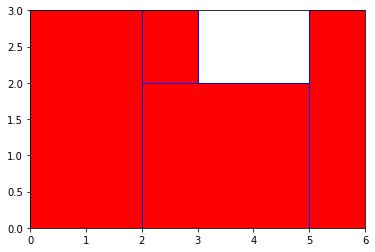

In [44]:
wins = [[2,3], [3,2], [1, 1], [1, 3]]


positions = rpack.pack(wins)

fig,ax = plt.subplots(1)

maxx = 0
maxy = 0
for ((x, y), (w, h)) in zip(positions, wins):
    if x + w > maxx: maxx = x+w
    if y + h > maxy: maxy = y+h        
    rect = matplotlib.patches.Rectangle((x, y),w,h,linewidth=1,edgecolor='b',facecolor='red')
    ax.add_patch(rect)

ax.set_ylim(0, maxy)
ax.set_xlim(0, maxx)

plt.show()

In [31]:
x = np.array([0.314, 0.25, 0.125, 2.256])

x.min()


0.125

In [38]:
x.min() * 10**(-np.round(np.log10(x.min())) + 2)

125.0

In [41]:
np.array(wins).min()

1

In [48]:
np.log10

<ufunc 'log10'>

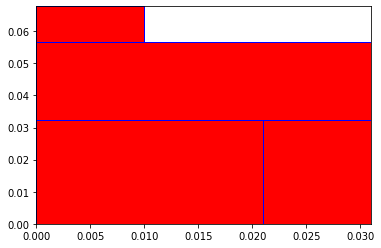

In [52]:
wins = [[0.021,0.0325], [0.031,0.024], [0.01, 0.011257], [0.01, 0.0322]]

scaling = 10**(-np.round(np.log10(np.array(wins).min())) + 2)

positions = rpack.pack((int(w * scaling),
                        int(h * scaling))
                        for (w, h) in wins)

fig,ax = plt.subplots(1)

maxx = 0
maxy = 0
for ((x, y), (w, h)) in zip(positions, wins):
    x = x / scaling
    y = y / scaling
    if x + w > maxx: maxx = x+w
    if y + h > maxy: maxy = y+h        
    rect = matplotlib.patches.Rectangle((x, y),w,h,linewidth=1,edgecolor='b',facecolor='red')
    ax.add_patch(rect)

ax.set_ylim(0, maxy)
ax.set_xlim(0, maxx)

plt.show()

In [53]:
p = numpy.array(positions)

In [54]:
p

array([[  0,   0],
       [  0, 325],
       [  0, 565],
       [210,   0]])

In [58]:
p[:,0].max(), p[:,1].max()

(210, 565)

In [62]:
tuple(p.max(axis=0))

(210, 565)

In [63]:
a = np.array([1.2, 3.3, 4.4, 5.5, 6.6])

In [65]:
np.array(a, dtype=int)

array([1, 3, 4, 5, 6])

In [67]:
np.array([x for x in range(10)])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [72]:
[list(x) for x in np.array(positions)]

[[0, 0], [0, 325], [0, 565], [210, 0]]

In [74]:
p = np.array(positions)

In [80]:
p[:,1]

array([  0, 325, 565,   0])

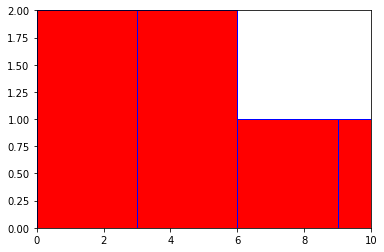

In [92]:
wins = [[2,3], [3,2], [1, 1], [1, 3]]


packer = rectpack.newPacker(pack_algo=rectpack.SkylineBl) #, sort_algo=rectpack.SORT_RATIO)
for i, (w, h) in enumerate(wins):
    packer.add_rect(w, h, i)

packer.add_bin(100, 100)
packer.pack()

fig,ax = plt.subplots(1)

maxx = 0
maxy = 0
for b, x, y, w, h, rid in packer.rect_list():
    if x + w > maxx: maxx = x+w
    if y + h > maxy: maxy = y+h        
    rect = matplotlib.patches.Rectangle((x, y),w,h,linewidth=1,edgecolor='b',facecolor='red')
    ax.add_patch(rect)

ax.set_ylim(0, maxy)
ax.set_xlim(0, maxx)

plt.show()